In [1]:
from getdist import plots
import getdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/Courbes_modifs_BCemu/"

# Tests de base

## Pk

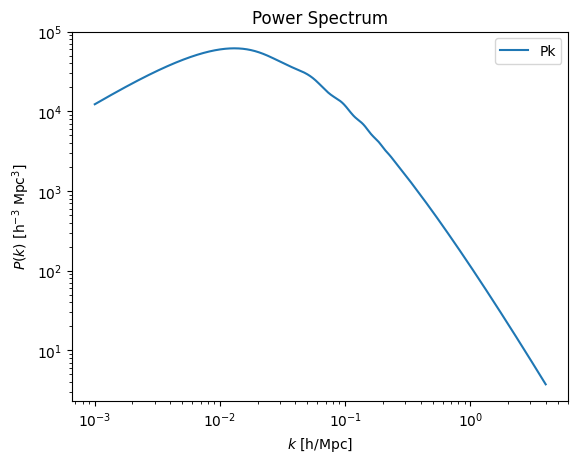

In [25]:
data = np.loadtxt(path+"Pk.txt", skiprows=1)


# Sépare les colonnes
k = data[:, 0]  # 1ère colonne
Pk = data[:, 1]  # 2ème colonne

plt.plot(k, Pk, label='Pk')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ [h/Mpc]')
plt.ylabel(r'$P(k)$ [h$^{-3}$ Mpc$^3$]')
plt.title('Power Spectrum')
plt.legend()
# plt.grid()
plt.show()

## Sigma

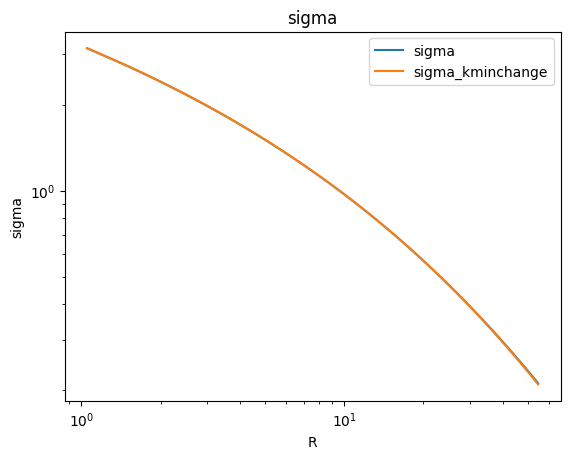

In [15]:
data = np.loadtxt(path+"sigma.txt", skiprows=1)
data_kminchange = np.loadtxt(path+"sigma_kminchange.txt", skiprows=1)

# Sépare les colonnes
R = data[:, 0]  # 1ère colonne
sigma = data[:, 1]  # 2ème colonne
R_kminchange = data_kminchange[:, 0]  # 1ère colonne
sigma_kminchange = data_kminchange[:, 1]  # 2ème colonne

plt.plot(R, sigma, label='sigma')
plt.plot(R_kminchange, sigma_kminchange, label='sigma_kminchange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("R")
plt.ylabel("sigma")
plt.title('sigma')
plt.legend()
# plt.grid()
plt.show()

## Cl

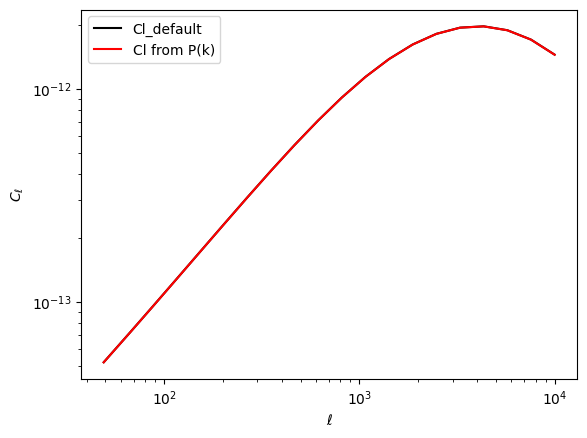

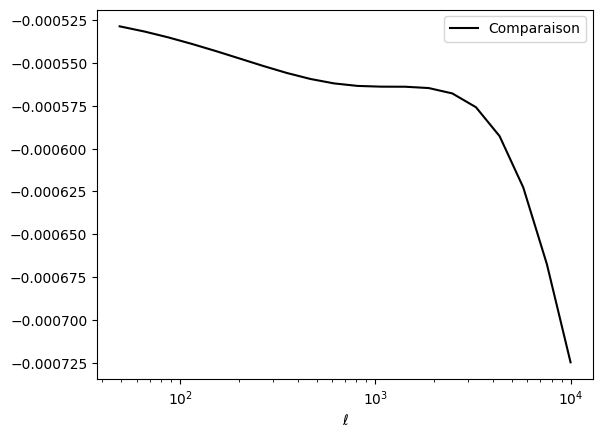

In [17]:
default = np.loadtxt("C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/Mock/mock_default.txt")
data = np.loadtxt(path+"Cl_from_Pk.txt")


# Sépare les colonnes
ell_default = default[:, 0]  # 1ère colonne
Cl_default = default[:, 1]  # 2ème colonne
ell = data[:, 0]  # 1ère colonne
Cl = data[:, 1]  # 2ème colonne

plt.plot(ell_default, Cl_default, label='Cl_default', color = 'black')
plt.plot(ell, Cl, label='Cl from P(k)', color = 'red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(ell, Cl/Cl_default - 1, label = "Comparaison", color = 'black')
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.show()

# Avec BCemu

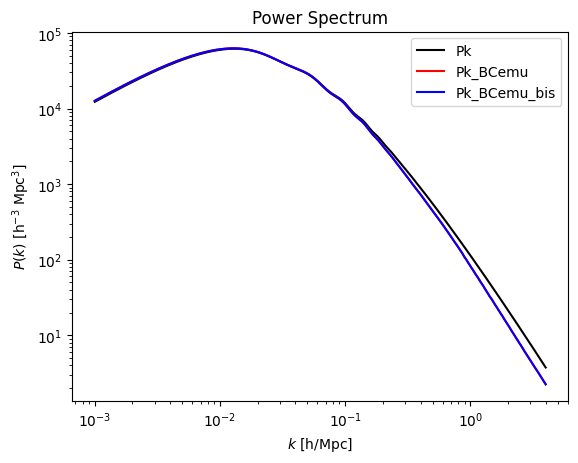

Text(0.5, 1.0, 'Power Spectrum')

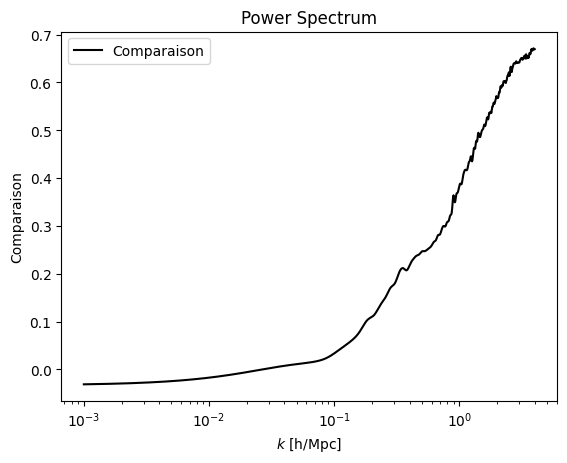

In [31]:
data = np.loadtxt(path+"Pk.txt", skiprows=1)
data_BCemu = np.loadtxt(path+"Pk_BCemu.txt", skiprows=1)
data_BCemu_bis = np.loadtxt(path+"Pk_BCemu_bis.txt", skiprows=1)    # Avec les paramètres dans le yaml

# Sépare les colonnes
k = data[:, 0]  # 1ère colonne
Pk = data[:, 1]  # 2ème colonne
k_BCemu = data_BCemu[:, 0]  # 1ère colonne
Pk_BCemu = data_BCemu[:, 1]  # 2ème colonne
k_BCemu_bis = data_BCemu_bis[:, 0]  # 1ère colonne
Pk_BCemu_bis = data_BCemu_bis[:, 1]  # 2ème colonne

plt.plot(k, Pk, label='Pk', color = 'black')
plt.plot(k_BCemu, Pk_BCemu, label='Pk_BCemu', color = 'red')
plt.plot(k_BCemu_bis, Pk_BCemu_bis, label='Pk_BCemu_bis', color = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ [h/Mpc]')
plt.ylabel(r'$P(k)$ [h$^{-3}$ Mpc$^3$]')
plt.title('Power Spectrum')
plt.legend()
# plt.grid()
plt.show()


plt.plot(k, Pk/ Pk_BCemu - 1, label = "Comparaison", color = 'black')
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$k$ [h/Mpc]')
plt.ylabel(r'Comparaison')
plt.title('Power Spectrum')

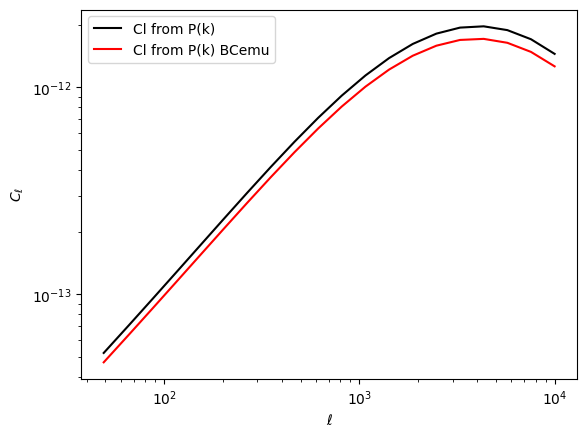

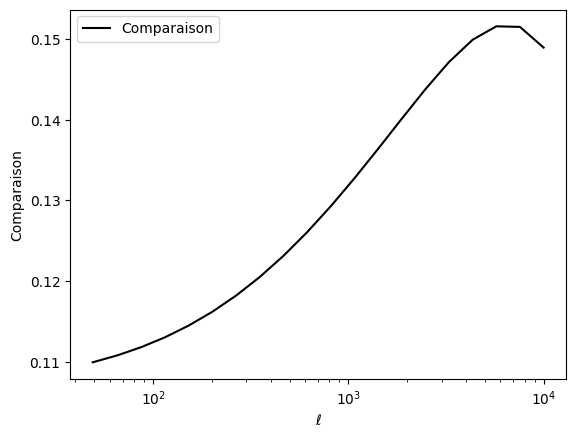

In [19]:
data = np.loadtxt(path+"Cl_from_Pk.txt")
data_BCemu = np.loadtxt(path+"Cl_from_Pk_BCemu.txt")


# Sépare les colonnes
ell = data[:, 0]  # 1ère colonne
Cl = data[:, 1]  # 2ème colonne
ell_BCemu = data_BCemu[:, 0]  # 1ère colonne
Cl_BCemu = data_BCemu[:, 1]  # 2ème colonne

plt.plot(ell, Cl, label='Cl from P(k)', color = 'black')
plt.plot(ell_BCemu, Cl_BCemu, label='Cl from P(k) BCemu', color = 'red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(ell, Cl/Cl_BCemu - 1, label = "Comparaison", color = 'black')
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'Comparaison')
plt.show()

# Test MCMC

In [2]:
path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/"
run_default = getdist.loadMCSamples(path+'config_Mock_A10',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)
run_baryons = getdist.loadMCSamples(path+'Mock_A10_baryons',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)

C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data\Mock_A10_baryons.1.txt
Removed 0.3 as burn in


<Figure size 900x675 with 0 Axes>

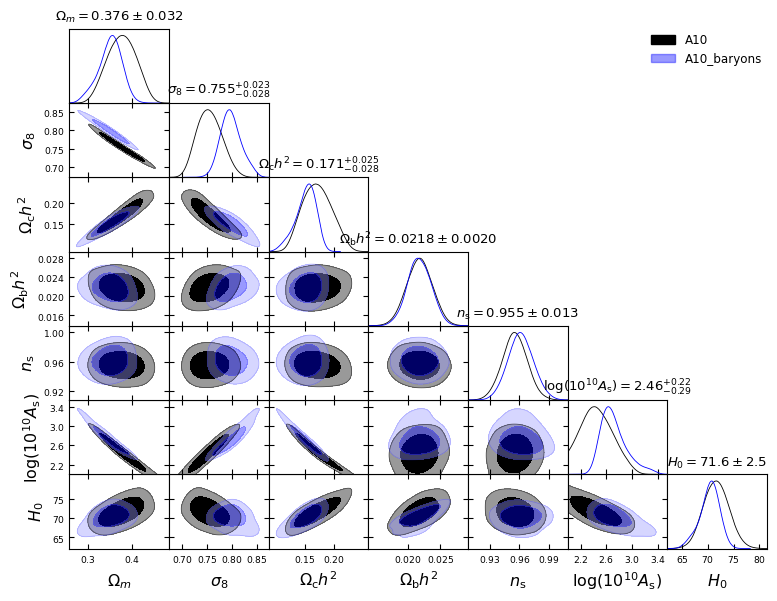

In [3]:
samples = [run_default,run_baryons]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["omegam", "sigma8", "omch2","ombh2","ns","logA","H0"],   # Paramètres à afficher
    filled=[True],
    legend_labels=["A10","A10_baryons"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "red"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('Mock_baryons.pdf')

# MCMC sur les baryons

In [4]:
path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/S8/"
run = getdist.loadMCSamples(path+'baryon_params',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)

C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/S8\baryon_params.1.txt
Removed 0.3 as burn in


<Figure size 900x675 with 0 Axes>

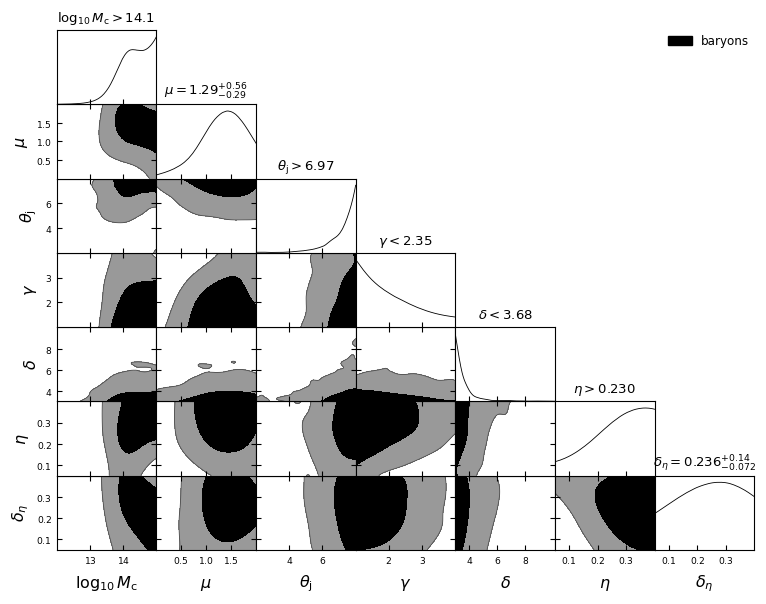

In [5]:
samples = [run]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["bar_log10Mc","bar_mu","bar_thej","bar_gamma","bar_delta","bar_eta","bar_deta"],   # Paramètres à afficher
    filled=[True],
    legend_labels=["baryons"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "red"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('baryons_params.pdf')